In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('datasets/funcionarios.csv')
df.head(10)

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim
5,Programador,22,5300.0,2000.0,não
6,Analista,20,NaN,1200.0,não
7,Diretor,50,18000.0,8000.0,sim
8,Fundador,65,38000.0,28000.0,sim
9,Analista,32,7300.0,4000.0,não


In [21]:
Y = df.iloc[:,4].values
X = df.iloc[:,:-1]
X


,cargo,idade,salario,bonus
0,Diretor,45,24000.0,10000.0
1,Analista,22,8000.0,2000.0
2,Programador,30,NaN,1000.0
3,Gerente,24,15100.0,NaN
4,Gerente,30,35000.0,6000.0
5,Programador,22,5300.0,2000.0
6,Analista,20,NaN,1200.0
7,Diretor,50,18000.0,8000.0
8,Fundador,65,38000.0,28000.0
9,Analista,32,7300.0,4000.0


In [15]:
X.dropna(axis=0, inplace=True)

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')

In [13]:
X

,cargo,idade,salario,bonus
0,Diretor,45,24000.0,10000.0
1,Analista,22,8000.0,2000.0
2,Programador,30,NaN,1000.0
3,Gerente,24,15100.0,NaN
4,Gerente,30,35000.0,6000.0
5,Programador,22,5300.0,2000.0
6,Analista,20,NaN,1200.0
7,Diretor,50,18000.0,8000.0
8,Fundador,65,38000.0,28000.0
9,Analista,32,7300.0,4000.0


In [23]:
ds = X.copy()
ds.head(3)

,cargo,idade,salario,bonus
0,Diretor,45,24000.0,10000.0
1,Analista,22,8000.0,2000.0
2,Programador,30,NaN,1000.0


In [24]:
imputer = imputer.fit(ds[['salario', 'bonus']])

In [28]:
ds[['salario','bonus']] = imputer.transform(ds[['salario', 'bonus']])
ds.head(13)

,cargo,idade,salario,bonus
0,Diretor,45,24000.000000,10000.0
1,Analista,22,8000.000000,2000.0
2,Programador,30,16795.333333,1000.0
3,Gerente,24,15100.000000,7200.0
4,Gerente,30,35000.000000,6000.0
5,Programador,22,5300.000000,2000.0
6,Analista,20,16795.333333,1200.0
7,Diretor,50,18000.000000,8000.0
8,Fundador,65,38000.000000,28000.0
9,Analista,32,7300.000000,4000.0


In [36]:
ds_median = X.copy()
imputer2 = imputer2.fit(ds_median[['salario', 'bonus']])

In [37]:
ds_median[['salario','bonus']] = imputer2.transform(ds_median[['salario', 'bonus']])
ds_median.head(13)

,cargo,idade,salario,bonus
0,Diretor,45,24000.0,10000.0
1,Analista,22,8000.0,2000.0
2,Programador,30,14550.0,1000.0
3,Gerente,24,15100.0,5000.0
4,Gerente,30,35000.0,6000.0
5,Programador,22,5300.0,2000.0
6,Analista,20,14550.0,1200.0
7,Diretor,50,18000.0,8000.0
8,Fundador,65,38000.0,28000.0
9,Analista,32,7300.0,4000.0


In [46]:
from sklearn.preprocessing import Normalizer
X_normalizer = ds.copy()
X_normalizer[['idade_norm', 'salario_norm','bonus_norm']] = Normalizer().fit_transform(X_normalizer[['idade', 'salario', 'bonus']])
X_normalizer.head()

,cargo,idade,salario,bonus,idade_norm,salario_norm,bonus_norm
0,Diretor,45,24000.000000,10000.0,0.001731,0.923076,0.384615
1,Analista,22,8000.000000,2000.0,0.002668,0.970139,0.242535
2,Programador,30,16795.333333,1000.0,0.001783,0.998231,0.059435
3,Gerente,24,15100.000000,7200.0,0.001435,0.902638,0.430397
4,Gerente,30,35000.000000,6000.0,0.000845,0.985622,0.168964


Text(0, 0.5, 'Densidade')

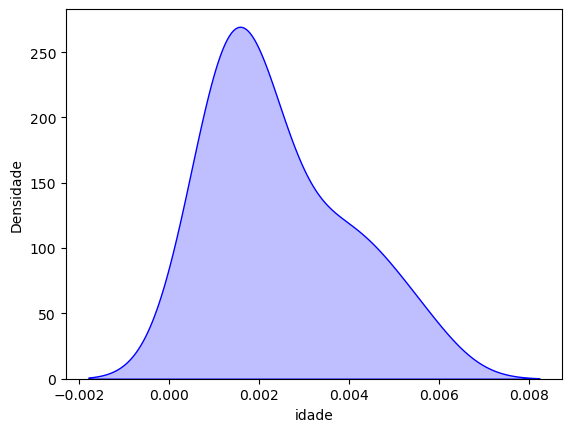

In [55]:
sns.kdeplot(X_normalizer['idade_norm'], color='b', fill=True, label='Idade')
plt.xlabel('idade')
plt.ylabel('Densidade')

In [48]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = ds.copy()
X_minmax[['idade_norm', 'salario_norm','bonus_norm']] = MinMaxScaler().fit_transform(X_minmax[['idade', 'salario', 'bonus']])
X_minmax


,cargo,idade,salario,bonus,idade_norm,salario_norm,bonus_norm
0,Diretor,45,24000.000000,10000.0,0.555556,0.607359,0.333333
1,Analista,22,8000.000000,2000.0,0.044444,0.158627,0.037037
2,Programador,30,16795.333333,1000.0,0.222222,0.405299,0.000000
3,Gerente,24,15100.000000,7200.0,0.088889,0.357752,0.229630
4,Gerente,30,35000.000000,6000.0,0.222222,0.915863,0.185185
5,Programador,22,5300.000000,2000.0,0.044444,0.082903,0.037037
6,Analista,20,16795.333333,1200.0,0.000000,0.405299,0.007407
7,Diretor,50,18000.000000,8000.0,0.666667,0.439085,0.259259
8,Fundador,65,38000.000000,28000.0,1.000000,1.000000,1.000000
9,Analista,32,7300.000000,4000.0,0.266667,0.138995,0.111111


Text(0, 0.5, 'Densidade')

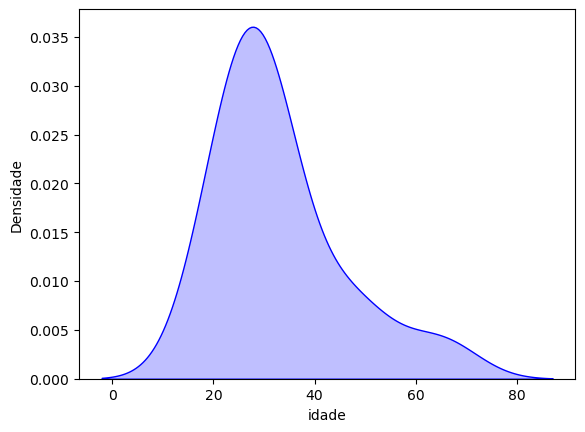

In [52]:
sns.kdeplot(X_minmax['idade'], color='b', fill=True, label='Idade')
plt.xlabel('idade')
plt.ylabel('Densidade')

Text(0, 0.5, 'Densidade')

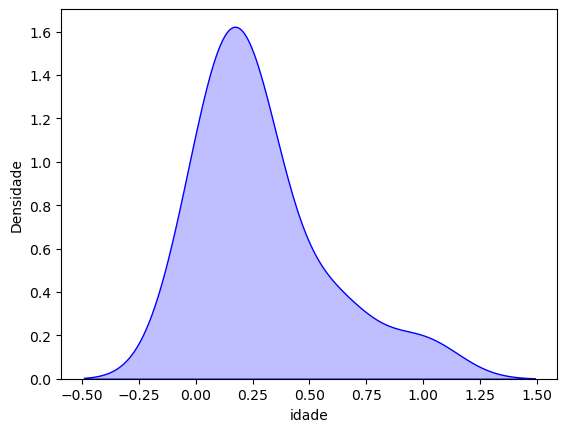

In [53]:
sns.kdeplot(X_minmax['idade_norm'], color='b', fill=True, label='Idade')
plt.xlabel('idade')
plt.ylabel('Densidade')